In [48]:
import pandas as pd
import nltk
import numpy as np
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [45]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [52]:
ps = PorterStemmer()

In [3]:
data = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [8]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = LabelEncoder()

In [11]:
data['target'] = encoder.fit_transform(data['target'])

In [12]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
data.duplicated().sum()

403

In [15]:
data = data.drop_duplicates(keep='first')

In [16]:
data.duplicated().sum()

0

In [17]:
data.shape

(5169, 2)

# EDA

In [18]:
import matplotlib.pyplot as plt

In [19]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

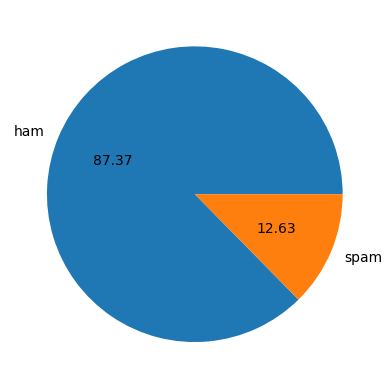

In [20]:
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
data['NumberOF_Characters'] = data['text'].apply(len)

In [23]:
data.head()

,target,text,NumberOF_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
data['NumberOF_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
data.head()

,target,text,NumberOF_Characters,NumberOF_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
data['NumberOF_Sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
data.head()

,target,text,NumberOF_Characters,NumberOF_words,NumberOF_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# Data Preprocessing
### 1. lowercase
### 2. Tokenization
### 3. Removing Special Characters
### 4. Removing Stop words and punctuation
### 5. Stemming

In [56]:
def Preprocess_txt(text):
    # lowercase
    text = text.lower()
    # Tokenization
    text = nltk.word_tokenize(text)
    # Special Chracters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # StopWords and Punctuation
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
        
            
    return " ".join(y)

In [59]:
Preprocess_txt('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [61]:
data['transform_text'] = data['text'].apply(Preprocess_txt)

In [62]:
data.head()

,target,text,NumberOF_Characters,NumberOF_words,NumberOF_Sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [131]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [132]:
cv = CountVectorizer()
tivf = TfidfVectorizer(max_features=3000)

In [133]:
X = tivf.fit_transform(data['transform_text']).toarray()

In [134]:
X.shape

(5169, 3000)

In [135]:
y = data['target'].values

In [136]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [139]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [140]:
gb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [141]:
gb.fit(X_train,y_train)
ypred1 = gb.predict(X_test)
print("Accuaracy Score: ",accuracy_score(y_test,ypred1))
print("Confusion Matrix: ",confusion_matrix(y_test,ypred1))
print("Precision: ",precision_score(y_test,ypred1))

Accuaracy Score:  0.8694390715667312
Confusion Matrix:  [[788 108]
 [ 27 111]]
Precision:  0.5068493150684932


In [142]:
mnb.fit(X_train,y_train)
ypred2 = mnb.predict(X_test)
print("Accuaracy Score: ",accuracy_score(y_test,ypred2))
print("Confusion Matrix: ",confusion_matrix(y_test,ypred2))
print("Precision: ",precision_score(y_test,ypred2))

Accuaracy Score:  0.9709864603481625
Confusion Matrix:  [[896   0]
 [ 30 108]]
Precision:  1.0


In [143]:
bnb.fit(X_train,y_train)
ypred3 = bnb.predict(X_test)
print("Accuaracy Score: ",accuracy_score(y_test,ypred3))
print("Confusion Matrix: ",confusion_matrix(y_test,ypred3))
print("Precision: ",precision_score(y_test,ypred3))

Accuaracy Score:  0.9835589941972921
Confusion Matrix:  [[895   1]
 [ 16 122]]
Precision:  0.991869918699187


In [144]:
import xgboost as xgd

In [145]:
xgd_classifier = xgd.XGBClassifier()

In [146]:
xgd_classifier.fit(X_train,y_train)
ypred4 = xgd_classifier.predict(X_test)
print("Accuaracy Score: ",accuracy_score(y_test,ypred4))
print("Confusion Matrix: ",confusion_matrix(y_test,ypred4))
print("Precision: ",precision_score(y_test,ypred4))

Accuaracy Score:  0.971953578336557
Confusion Matrix:  [[889   7]
 [ 22 116]]
Precision:  0.943089430894309


## Ensemble

In [147]:
from sklearn.ensemble import VotingClassifier

In [148]:
estimator = [("gb",gb),("mnb",mnb),('bnb',bnb),('xg',xgd_classifier)]

In [149]:
vote_cls = VotingClassifier(estimators=estimator,voting='soft')

In [150]:
vote_cls.fit(X_train,y_train)

VotingClassifier(estimators=[('gb', GaussianNB()), ('mnb', MultinomialNB()),
                             ('bnb', BernoulliNB()),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=N...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [151]:
vote_cls.fit(X_train,y_train)
ypred5 = vote_cls.predict(X_test)
print("Accuaracy Score: ",accuracy_score(y_test,ypred5))
print("Confusion Matrix: ",confusion_matrix(y_test,ypred5))
print("Precision: ",precision_score(y_test,ypred5))

Accuaracy Score:  0.9825918762088974
Confusion Matrix:  [[896   0]
 [ 18 120]]
Precision:  1.0


In [152]:
import pickle

In [153]:
pickle.dump(tivf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('multinoimalnaiveBayes.pkl','wb'))
pickle.dump(vote_cls,open('votingclassifier.pkl','wb'))